In [125]:
import json
from PIL import Image
from numpy import asarray
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split

algorithm_globals.random_seed = 12345

In [126]:
qc = QuantumCircuit(16,16)

In [127]:
labels = np.load('data/labels.npy')
test_labels = []
test_images = []
images = []
for i in range(1,2001):
    images.append(f'data/Data/{i}.jpeg')


In [142]:
im = Image.open('data/Data/1.jpeg')
im = im.resize((4,4))


In [143]:
img_arr = []
for i in range (0,2000):
    img_arr.append(asarray(Image.open(images[i])))

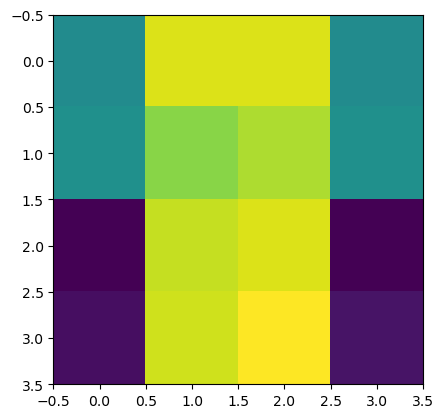

In [156]:
ih = asarray(im)
plt.imshow(ih)

In [145]:
k = 0
for i in range(0,4):
    for j in range(0,4):
        qc.rx(i1[i][j],k)
        k+=1

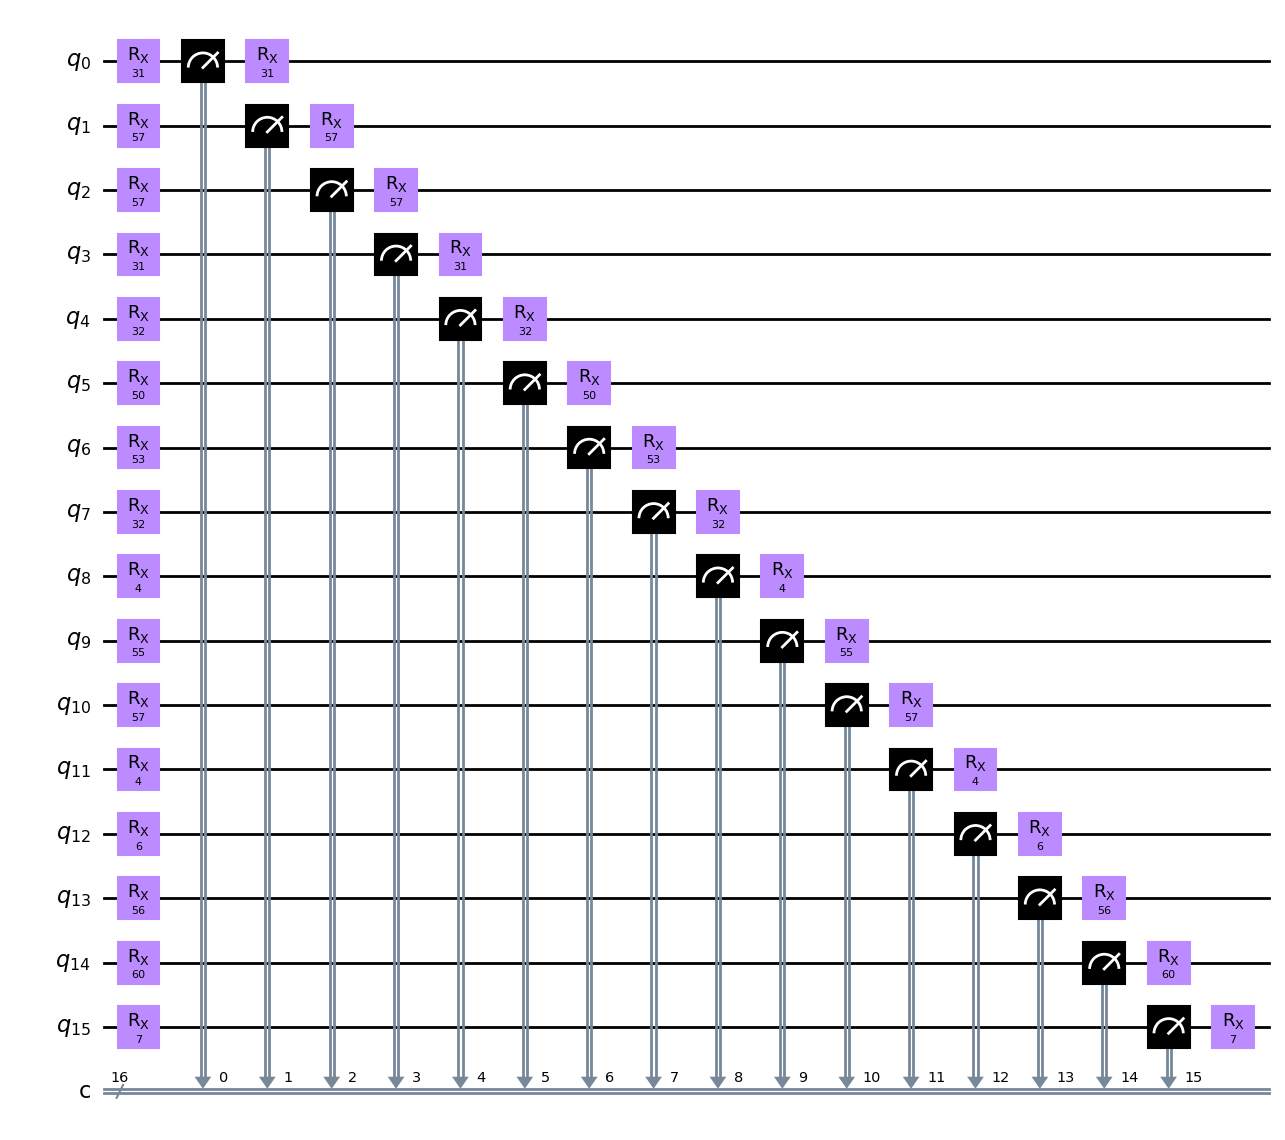

In [146]:
qc.draw('mpl')

In [147]:
for i in range(16):
    qc.measure(i,i)

In [148]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()

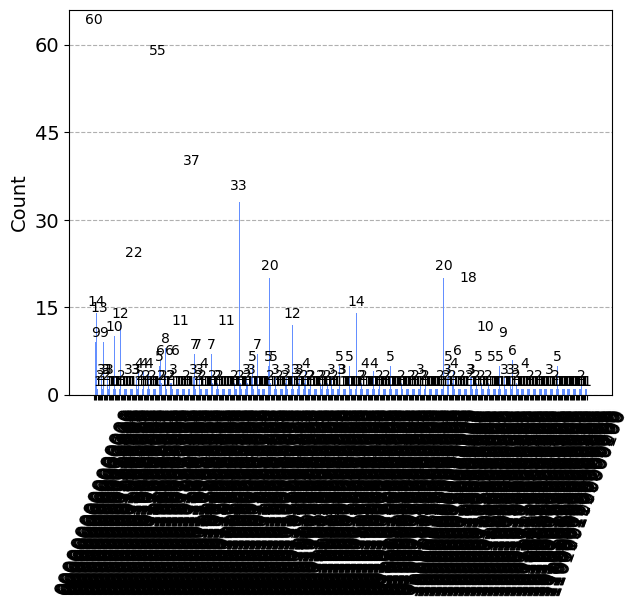

In [149]:
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [150]:
probabilities = result.get_counts(qc)
states = dict.keys(probabilities)
zeros = 0
ones = 0
pixel = []
states1 = []
for key, val in probabilities.items():
    states1.append(key)

In [151]:
pixel = []
for i in range(16):
    zeros = 0
    for j in range(210):
        
        if states1[j][i] == '1':
            ones+=1
        else:
            zeros+=1
    print(zeros)
    pixel.append(np.arccos(zeros/1024))

154
190
174
190
131
173
101
133
158
182
193
163
183
174
177
169


In [152]:
pixel1 = [pixel[:4],pixel[4:8],pixel[8:12],pixel[12:16]]

In [153]:
pixel_final = np.array(pixel1)

In [154]:
i = Image.fromarray(pixel_final.astype(np.uint8))

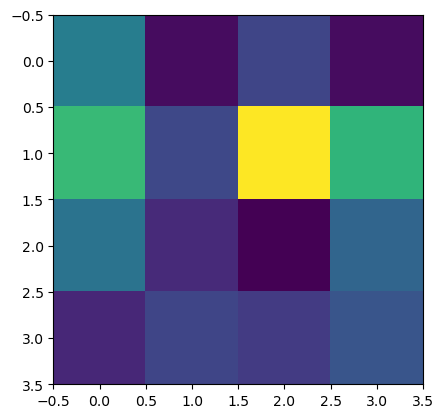

In [155]:
plt.imshow(pixel_final)

In [119]:
i.save('bruh.png')